# Introduction to Statistics in R

Statistics is the study of how to collect, analyze, and draw conclusions from data. It’s a hugely valuable tool that you can use to bring the future into focus and infer the answer to tons of questions. For example, what is the likelihood of someone purchasing your product, how many calls will your support team receive, and how many jeans sizes should you manufacture to fit 95% of the population? In this course, you'll use sales data to discover how to answer questions like these as you grow your statistical skills and learn how to calculate averages, use scatterplots to show the relationship between numeric values, and calculate correlation. You'll also tackle probability, the backbone of statistical reasoning, and learn how to conduct a well-designed study to draw your own conclusions from data.

## Summary Statistics

Summary statistics gives you the tools you need to boil down massive datasets to reveal the highlights. In this chapter, you'll explore summary statistics including mean, median, and standard deviation, and learn how to accurately interpret them. You'll also develop your critical thinking skills, allowing you to choose the best summary statistics for your data.

### Mean and median
In this chapter, you'll be working with the 2018 Food Carbon Footprint Index from nu3. The food_consumption dataset contains information about the kilograms of food consumed per person per year in each country in each food category (consumption) as well as information about the carbon footprint of that food category (co2_emissions) measured in kilograms of carbon dioxide, or CO, per person per year in each country.

In this exercise, you'll compute measures of center to compare food consumption in the US and Belgium using your dplyr skills.

In [1]:
library(dplyr)

food_consumption <- readRDS("food_consumption.rds")

# Filter for Belgium
belgium_consumption <- food_consumption %>%
  filter(country == "Belgium")

# Filter for USA
usa_consumption <- food_consumption %>%
  filter(country == "USA")

# Calculate mean and median consumption in Belgium
mean(belgium_consumption$consumption)
median(belgium_consumption$consumption)

# Calculate mean and median consumption in USA
mean(usa_consumption$consumption)
median(usa_consumption$consumption)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 42.13273

[1] 12.59

[1] 44.65

[1] 14.58

In [2]:
# other way to do it, much better 
food_consumption %>%
  # Filter for Belgium and USA
  filter(country %in% c("Belgium", "USA")) %>%
  # Group by country
   group_by(country)%>%
  # Get mean_consumption and median_consumption
  summarize(mean_consumption = mean(consumption),
      median_consumption = median(consumption))

`summarise()` ungrouping output (override with `.groups` argument)


country,mean_consumption,median_consumption
Belgium,42.13273,12.59
USA,44.65000,14.58


### Mean vs. median
In the video, you learned that the mean is the sum of all the data points divided by the total number of data points, and the median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median. In this exercise, you'll compare these two measures of center.

Warning message:
"package 'ggplot2' was built under R version 3.6.3"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


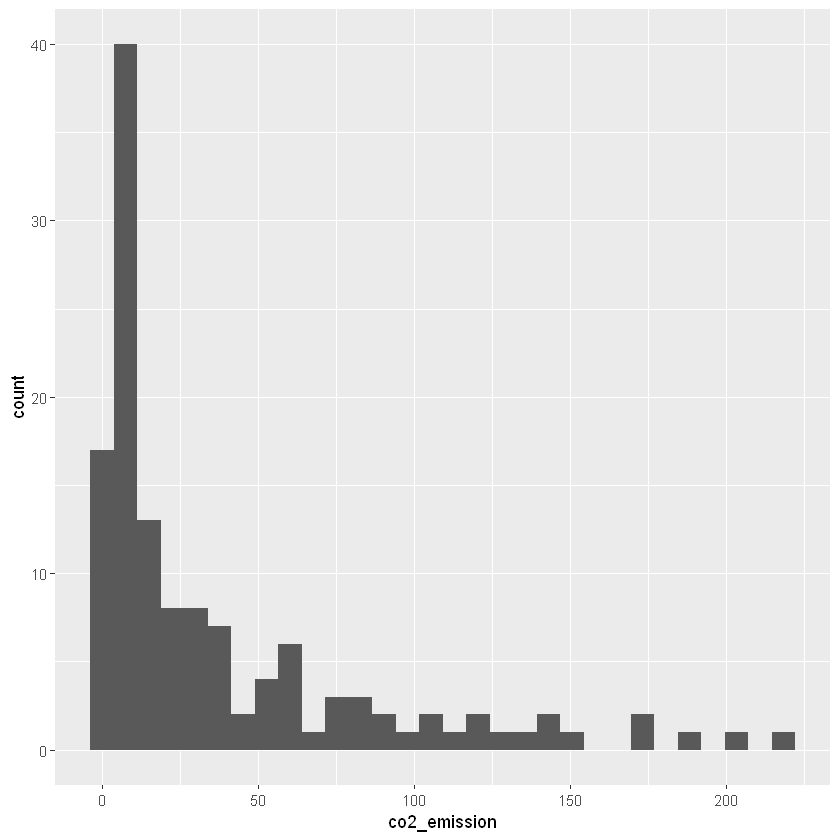

In [3]:
library(ggplot2)

food_consumption %>%
  # Filter for rice food category
  filter(food_category == "rice") %>%
  # Create histogram of co2_emission
  ggplot(.,aes(co2_emission)) + geom_histogram()


In [4]:
food_consumption %>%
  # Filter for rice food category
filter(food_category == "rice") %>% 
  # Get mean_co2 and median_co2
  summarize(mean_co2 = mean(co2_emission), median_co2 = median(co2_emission))


mean_co2,median_co2
37.59162,15.2


### Quartiles, quantiles, and quintiles
Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

In this exercise, you'll calculate quartiles, quintiles, and deciles, which split up a dataset into 4, 5, and 10 pieces, respectively.

In [5]:
# Calculate the quartiles of co2_emission
quantile(food_consumption$co2_emission)

0%       25%       50%       75%      100% 
   0.0000    5.2100   16.5300   62.5975 1712.0000

In [6]:
# Calculate the quintiles of co2_emission
quantile(food_consumption$co2_emission, probs = seq(0,1,0.2))

0%      20%      40%      60%      80%     100% 
   0.000    3.540   11.026   25.590   99.978 1712.000

In [7]:
# Calculate the deciles of co2_emission
quantile(food_consumption$co2_emission, probs = seq(0,1,0.1))

0%      10%      20%      30%      40%      50%      60%      70% 
   0.000    0.668    3.540    7.040   11.026   16.530   25.590   44.271 
     80%      90%     100% 
  99.978  203.629 1712.000

### Variance and standard deviation
Variance and standard deviation are two of the most common ways to measure the spread of a variable, and you'll practice calculating these in this exercise. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

`summarise()` ungrouping output (override with `.groups` argument)


food_category,var_co2,sd_co2
beef,8.874841e+04,297.9067105
eggs,2.137182e+01,4.6229665
fish,9.216373e+02,30.3584807
lamb_goat,1.647552e+04,128.3569958
dairy,1.767189e+04,132.9356686
nuts,3.563965e+01,5.9698955
pork,3.094964e+03,55.6323965
poultry,2.450268e+02,15.6533320
rice,2.281376e+03,47.7637545
soybeans,8.798818e-01,0.9380202


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


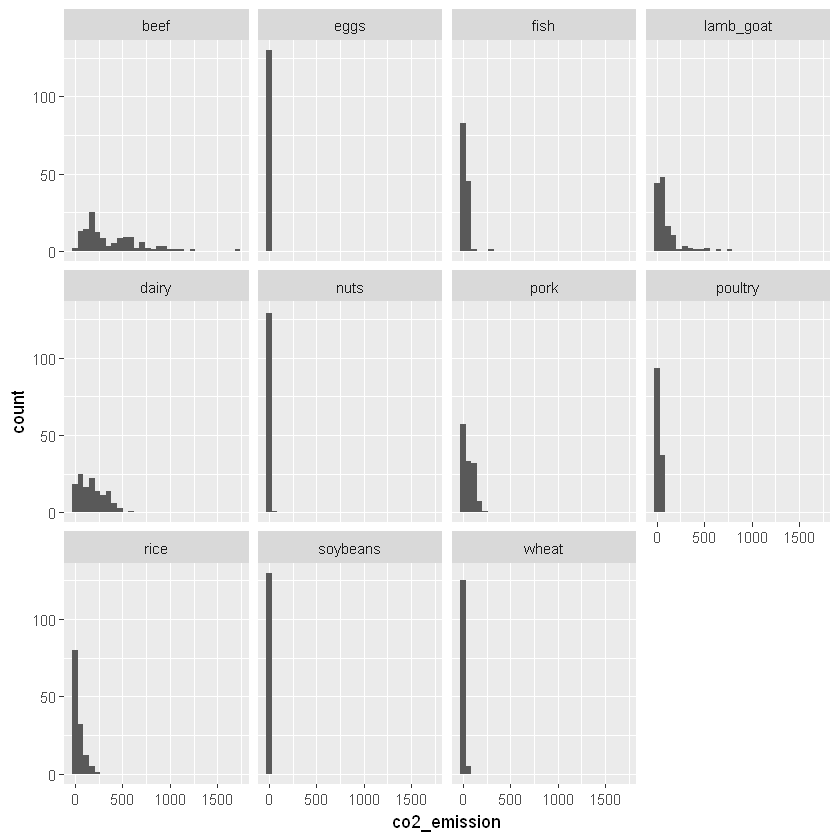

In [9]:
# Calculate variance and sd of co2_emission for each food_category
food_consumption %>% 
  group_by(food_category) %>% 
  summarise(var_co2 = var(co2_emission),
     sd_co2 = sd(co2_emission))

# Plot food_consumption with co2_emission on x-axis
ggplot(food_consumption, aes(co2_emission)) +
  # Create a histogram
  geom_histogram() +
  # Create a separate sub-graph for each food_category
  facet_wrap(~ food_category)

### Finding outliers using IQR
Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than Q1 - 1.5*IQR or greater than Q3 + 1.5*IQR, it's considered an outlier. In fact, this is how the lengths of the whiskers in a ggplot2 box plot are calculated.

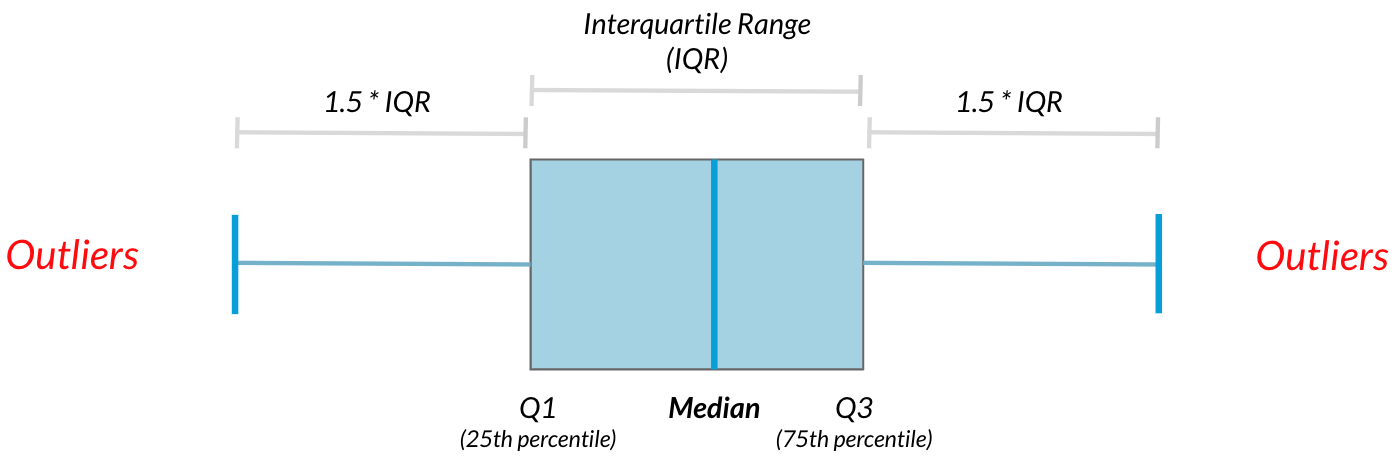

In [11]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country <- food_consumption %>%
  group_by(country) %>%
  summarise(total_emission = sum(co2_emission))

# Compute the first and third quantiles and IQR of total_emission
q1 <- quantile(emissions_by_country$total_emission, 0.25)
q3 <- quantile(emissions_by_country$total_emission, 0.75)
iqr <- q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower <- q1 - 1.5 * iqr
upper <- q3 + 1.5 * iqr

# Filter emissions_by_country to find outliers
emissions_by_country %>%
  filter(total_emission < lower | total_emission > upper)

`summarise()` ungrouping output (override with `.groups` argument)


country,total_emission
Argentina,2172.4
